In [36]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fontsize = 16
plt.rc('font', family='Times New Roman', weight='bold', size=fontsize)
plt.rc('lines', lw=3.5)
plt.rcParams.update({'font.size': fontsize})

sns.set_context("paper", rc={
    "font.size":fontsize,
    "axes.titlesize":fontsize,
    "axes.labelsize":fontsize,
    "xtick.labelsize": fontsize,
    'ytick.labelsize': fontsize,
    'grid.linewidth': 1.5,
                            })
sns.set_style("ticks", {"xtick.major.size": 14, "ytick.major.size": 14})



In [37]:
"""
命中率
"""
csvs = glob.glob("io/hit_rate*.csv")
for csv in csvs:
    cache_strategy = csv.split("_")[-1].strip(".csv")
    df = pd.read_csv(csv)
    avg_cache_hit = df['hit_rate'].mean()
    num_invos = df['invos'].sum()
    avg_cache_keys = df['num_of_cache_keys'].describe()
    print(f"{cache_strategy} => {avg_cache_hit}")

MyCache => 0.5387368801940124
GDSF => 0.2718467846331374
LRU => 0.5858962288858051
LFU => 0.20465824345668177


In [38]:
"""
执行延迟
"""
# function,container_name,schedule_time(ms),cold_start(ms),exec_time(ms),queue_time(ms),used_memory(MB),input_n

csvs = glob.glob("io/latency*.csv")
for csv in csvs:
    cache_strategy = csv.split("_")[-1].strip(".csv")
    df = pd.read_csv(csv)
    avg_used_mem = df['used_memory(MB)'].mean()
    avg_exec = df['exec_time(ms)'].mean()
    print(f"{cache_strategy} -> {avg_used_mem}, {avg_exec}")

LRU -> 1.69496484375, 295.8483509540558
MyCache -> 1.5828156422825541, 346.99503412913174


MyCache => 81.78442156862745
LRU => 75.35227754237287


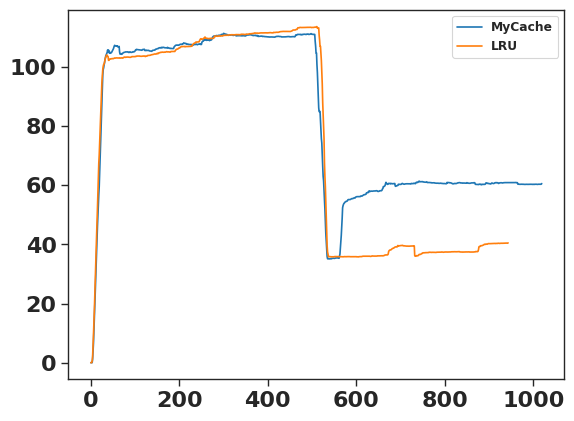

In [39]:
"""
资源利用率
"""
csvs = glob.glob("io/utilization*.csv")
# Time(s),Net_Receive(MB/s),CPU_Util(%),Disk_WR(0.1*MB/s),Mem_Util(0.01*MB)
for csv in csvs:
    cache_strategy = csv.split("_")[-1].strip(".csv")
    df = pd.read_csv(csv)
    df['Mem_Util(0.01*MB)'] -= df['Mem_Util(0.01*MB)'].min()
    df['Mem_Util(0.01*MB)'].plot(label=cache_strategy)

    avg_mem = df['Mem_Util(0.01*MB)'].mean()
    print(f"{cache_strategy} => {avg_mem}")
plt.legend()